In [1]:
files_lr = ["grideye.20180226.131139_up_lr.csv", "grideye.20180226.131154_up_lr.csv"]


#image = np.rot90(image, 2)
files_lr_180 = ["grideye.20180226.131742_down_lr.csv", "grideye.20180226.131757_down_lr.csv"]

#image = np.rot90(image, -1)
files_lr_90l = ["grideye.20180226.132237_left_lr.csv", "grideye.20180226.132253_left_lr.csv"]

#image = np.rot90(image, 1)
files_lr_90r = ["grideye.20180226.132552_right_lr.csv", "grideye.20180226.132606_right_lr.csv"]



files_rl = ["grideye.20180226.131146_up_rl.csv"] 
#image = np.rot90(image, 2)
files_rl_180 = ["grideye.20180226.131750_down_rl.csv"]
#image = np.rot90(image, -1)
files_rl_90l = ["grideye.20180226.132245_left_rl.csv"]
#image = np.rot90(image, 1)
files_rl_90r = ["grideye.20180226.132559_right_rl.csv"]    



In [4]:
threshold = [5754, 5857, 6083, 6060, 6149, 6057, 6175, 6210, 5823, 6075, 6149, 6172]

In [5]:
%cd Desktop/Dissertation/GridEYE-Experimental_Data/

/Users/montgomerygimpel/Desktop/Dissertation/GridEYE-Experimental_Data


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

In [7]:
images = []

In [19]:
n = 0
image_no = 0
#image = np.rot90(image, 2) # left -1 #right 1

file = "grideye.20180226.131139_up_lr.csv"


df = pd.read_csv(file, header=None)

while True:
    row = df.values[n, 0:]
    if sum(row) < threshold[0]:
        n+=1
        if n==50:
            break
        else:       
            continue
    else:
        image = row.reshape(8,8)
        #image = np.rot90(image, 2)
        images.append(image)
        n+=1
        #image_no+=1

In [ ]:
for image in images:
    print(image.shape)

In [20]:
print(len(images))

142


In [21]:
person_left = []

In [22]:
person_right = []

In [23]:
count = 0

for i in images:
    x = [sum(i[:,m]) for m in range(8)]
    if x.index(max(x)) < 4:
        person_left.append(i)
    elif x.index(max(x)) > 5:
        person_right.append(i)
    else:
        count+=1

print('Person Middle:', count)
print('Person Left:', len(person_left))
print('Person Right:', len(person_right))
print('Total:', count + len(person_left) + len(person_right))

Person Middle: 33
Person Left: 75
Person Right: 34
Total: 142


In [ ]:
plt.imshow(person_left[26])

In [24]:
two_people = []

In [ ]:
person_left[74]

In [ ]:
person_right[16]

In [ ]:
h = np.split(person_left[74], 2, axis=1)
h1 = h[0]
j = np.split(person_right[16], 2, axis=1)
j1 = j[1]

k = np.concatenate((h1, j1), axis=1)
k

In [25]:
import random

for i in range(100):
    #generate left half
    index1 = random.randint(0,len(person_left)-1)
    left_random = person_left[index1]
    left_random = np.split(left_random, 2, axis=1)
    left_half = left_random[0]
    #generate right half
    index2 = random.randint(0, len(person_right)-1)
    right_random = person_right[index2]
    right_random = np.split(right_random, 2, axis=1)
    right_half = right_random[1]
    #merge
    merged = np.concatenate((left_half, right_half), axis=1)
    two_people.append(merged)

In [26]:
two_people_flat = []

In [27]:
for i in two_people:
    i = i.ravel()
    two_people_flat.append(i)

In [28]:
one_person_flat =[]

In [29]:
for i in range(100):
    image_flat = images[i].ravel()
    one_person_flat.append(image_flat)

In [30]:
df1 = pd.DataFrame(two_people_flat)
df2 = pd.DataFrame(one_person_flat)

In [31]:
df1['label'] = 1
df2['label'] = 0

In [32]:
data = df1.append(df2)

In [33]:
variables = data.values[0:, :64]
target = data.values[0:, 64:65].ravel()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.3, random_state=25)
print('Training data and target sizes: \n{}, {}'.format(len(X_train), len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(len(X_test),len(y_test)))

Training data and target sizes: 
140, 140
Test data and target sizes: 
60, 60


In [94]:
model = svm.SVC()
parameters = {'kernel': ['rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

In [95]:
classifier = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

In [96]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        31
          1       0.97      0.97      0.97        29

avg / total       0.97      0.97      0.97        60




In [99]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[30  1]
 [ 1 28]]


In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.966666666667
Precision: 0.965517241379


In [102]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.96662958843159075

In [143]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier(gamma=1, max_depth=4)

In [152]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [153]:
y_pred = xgb_model.predict(X_test)

In [154]:
print("Classification report for classifier %s:\n%s\n"
      % (xgb_model, metrics.classification_report(y_test, y_pred)))

Classification report for classifier XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1):
             precision    recall  f1-score   support

          0       1.00      0.97      0.98        31
          1       0.97      1.00      0.98        29

avg / total       0.98      0.98      0.98        60




In [155]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[30  1]
 [ 0 29]]


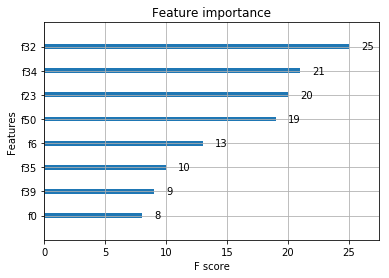

In [158]:
plot_importance(xgb_model, max_num_features = 8)
plt.show()